In [1]:
##loading module
import numpy as np
import pandas as pd
import cv2
#from keras.models import load_model
import keras.backend as k1
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras.engine import training
import time
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from keras import Sequential
from keras.layers import Average,MaxPool2D,Conv2D,Dense,Flatten,Dropout,GlobalAveragePooling2D,Convolution2D,AveragePooling2D,MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.python.framework.ops import Tensor
from keras.models import Model
from keras.applications import DenseNet121,DenseNet169
from tensorflow.python.keras.models import Input
#from keras.applications.densenet import preprocess_input
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2022-12-22 02:25:12.054205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 02:25:13.041093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-22 02:25:13.041164: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 02:25:13.189031: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already

In [2]:
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
print(l)

['augmented-image/late-blight', 'augmented-image/early-blight', 'augmented-image/backkleg', 'augmented-image/septoria', 'augmented-image/safe']


In [3]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s = cv2.imread(h, cv2.IMREAD_COLOR)       
        s = cv2.resize(s, (100,100))
        s= cv2.cvtColor(s, cv2.COLOR_RGB2BGR)
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


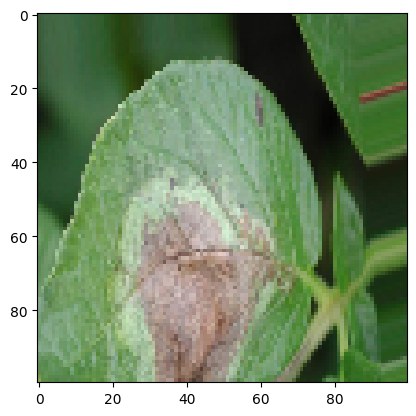

In [4]:
plt.imshow(extract[100][0])

In [5]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],100,100,3)
print(x.shape)
y1=y

(1608, 100, 100, 3)


In [6]:
x=x/255.0


In [44]:
lb=LabelEncoder()
y1=lb.fit_transform(y1)

In [7]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [8]:
#print(x.shape,y.shape)
k1.clear_session()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y1,test_size=0.3,random_state=42)

In [10]:
input_shape = x_train[0,:,:,:].shape
print(input_shape)
model_input = Input(shape=input_shape)
print(model_input)

(100, 100, 3)
KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [11]:
def ClsModel(n_classes=5, input_shape=(100,100,3)):

    model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(100, 100, 3)) 


    x=model_d.output


    x= GlobalAveragePooling2D()(x)

    x= BatchNormalization()(x)

    x= Dropout(0.5)(x)

    x= Dense(1024,activation='relu')(x) 

    x= Dense(512,activation='relu')(x) 

    x= BatchNormalization()(x)

    x= Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=model_d.input,outputs=preds)
    return model

In [12]:
model121=ClsModel(5,(100,100,3))
model121.summary()

2022-12-22 02:26:22.444501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-22 02:26:22.445136: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 02:26:22.445212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrithik-Lenovo-ideapad-320-15ISK): /proc/driver/nvidia/version does not exist
2022-12-22 02:26:22.445765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [13]:
for layer in model121.layers[:-5]:

    layer.trainable=False

    

for layer in model121.layers[-5:]:

    layer.trainable=True

In [14]:
model121.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model121.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [15]:
start = time.time()
checkpoint_path = "model121.hdf5"
cp_callback=ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history=model121.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test, y_test),callbacks=[cp_callback])
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 1.1206 - accuracy: 0.6187
Epoch 1: saving model to model121.hdf5
9/9 [==============================] - 59s 5s/step - loss: 1.1206 - accuracy: 0.6187 - val_loss: 0.6070 - val_accuracy: 0.7867
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8960
Epoch 2: saving model to model121.hdf5
9/9 [==============================] - 34s 4s/step - loss: 0.3405 - accuracy: 0.8960 - val_loss: 0.1376 - val_accuracy: 0.9462
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 0.1858 - accuracy: 0.9351
Epoch 3: saving model to model121.hdf5
9/9 [==============================] - 38s 4s/step - loss: 0.1858 - accuracy: 0.9351 - val_loss: 0.0839 - val_accuracy: 0.9627
Epoch 4/20
9/9 [==============================] - ETA: 0s - loss: 0.1489 - accuracy: 0.9458
Epoch 4: saving model to model121.hdf5
9/9 [==============================] - 35s 4s/step - loss: 0.1489 - accuracy: 0.9458 - val_loss

In [16]:
k1.clear_session()

In [17]:
def ClsModel_69(n_classes=5, input_shape=(100,100,3)):
    base_model = DenseNet169(weights=None, include_top=False, input_shape=input_shape)
    x=base_model.output
    x =Flatten()(x)

    x =BatchNormalization()(x)

    

    x =Dropout(0.5)(x)

    x =BatchNormalization()(x)
    x=Dense(1024,activation="relu")(x)
    x =Dense(units=128,
                       activation='relu',
                       )(x)

    x =Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=base_model.input,outputs=preds)
    return model

In [18]:
model169=ClsModel_69(5,(100,100,3))
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [19]:
for layer in model169.layers[:-5]:

    layer.trainable=False

    

for layer in model169.layers[-5:]:

    layer.trainable=True

In [20]:
model169.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [21]:
checkpoint_path = "model169.hdf5"
cp_callback=ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history1=model169.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,validation_data=(x_test, y_test),callbacks=[cp_callback])

Epoch 1/20
36/36 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.7289
Epoch 1: saving model to model169.hdf5
36/36 [==============================] - 68s 1s/step - loss: 0.7287 - accuracy: 0.7289 - val_loss: 1.4225 - val_accuracy: 0.3706
Epoch 2/20
36/36 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.8996
Epoch 2: saving model to model169.hdf5
36/36 [==============================] - 42s 1s/step - loss: 0.2840 - accuracy: 0.8996 - val_loss: 1.2820 - val_accuracy: 0.4638
Epoch 3/20
36/36 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9324
Epoch 3: saving model to model169.hdf5
36/36 [==============================] - 41s 1s/step - loss: 0.1817 - accuracy: 0.9324 - val_loss: 1.2487 - val_accuracy: 0.5342
Epoch 4/20
36/36 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9547
Epoch 4: saving model to model169.hdf5
36/36 [==============================] - 47s 1s/step - loss: 0.1495 - accuracy: 0

In [22]:
#cnn_classifier=model_cnn._estimator_type = "classifier"
#model121_classifier=model121._estimator_type = "classifier"

In [23]:
#intermediate = [('NN1', model_cnn), ('NN2',model121)]

In [24]:
'''
k1.clear_session()
#mlp
mlp_model=Sequential()
mlp_model.add(Flatten(input_shape=(100,100,3)))
mlp_model.add(Dense(256,activation="relu"))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(128,activation="relu"))
mlp_model.add(Dropout(0.2))

mlp_model.add(Dense(5,activation="softmax"))
mlp_model.summary()
'''

'\nk1.clear_session()\n#mlp\nmlp_model=Sequential()\nmlp_model.add(Flatten(input_shape=(100,100,3)))\nmlp_model.add(Dense(256,activation="relu"))\nmlp_model.add(Dropout(0.2))\nmlp_model.add(Dense(128,activation="relu"))\nmlp_model.add(Dropout(0.2))\n\nmlp_model.add(Dense(5,activation="softmax"))\nmlp_model.summary()\n'

In [25]:
#mlp_model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [26]:
'''
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
clf = StackingClassifier(estimators=intermediate, final_estimator=MLPClassifier())
clf.fit(x_train, y_train)
'''

'\nfrom sklearn.ensemble import StackingClassifier\nfrom sklearn.neural_network import MLPClassifier\nclf = StackingClassifier(estimators=intermediate, final_estimator=MLPClassifier())\nclf.fit(x_train, y_train)\n'

Stacked

In [27]:
import os 
model169_model= os.path.join(os.getcwd(),'model169.hdf5')
model121_model = os.path.join(os.getcwd(),'model121.hdf5')
model169.load_weights(model169_model)
model121.load_weights(model121_model)
model=[model169,model121]

In [28]:
from keras.models import load_model,save_model
save_model(model169,"model169.h5")
save_model(model121,"model121.h5")

In [29]:
md161=load_model("model169.h5")
md121=load_model("model121.h5")

In [30]:
all_model=[]
all_model.append(md121)
all_model.append(md161)

In [31]:
from keras.layers.merging import concatenate

In [32]:
def define_stacked_model(members):
	from keras.utils import plot_model
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(5, activation='softmax')(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [33]:
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	x1=np.array(X)
	#print(inputy_enc.shape,x1.shape)
	model.fit(X,inputy, epochs=10, verbose=1)

# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)

In [34]:
import numpy as np
k1.clear_session()
stacked_model = define_stacked_model(all_model)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, x_train, y_train)
# make predictions and evaluate


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10
36/36 [==============================] - 73s 1s/step - loss: 1.4567 - accuracy: 0.5644
Epoch 2/10
36/36 [==============================] - 49s 1s/step - loss: 1.3133 - accuracy: 0.6240
Epoch 3/10
36/36 [==============================] - 53s 1s/step - loss: 1.1731 - accuracy: 0.6293
Epoch 4/10
36/36 [==============================] - 53s 1s/step - loss: 1.0339 - accuracy: 0.8444
Epoch 5/10
36/36 [==============================] - 52s 1s/step - loss: 0.8994 - accuracy: 0.9769
Epoch 6/10
36/36 [==============================] - 49s 1s/step - loss: 0.7778 - accuracy: 0.9724
Epoch 7/10
36/36 [==============================] - 49s 1s/step - loss: 0.6628 - accuracy: 0.9796
Epoch 8/10
36/36 [==============================] - 48s 1s/step - loss: 0.5560 - accuracy: 0.9858
Epoch 9/10
36/36 [==============================] - 58s 2s/step - l

ValueError: Found input variables with inconsistent numbers of samples: [483, 1125]

In [46]:
yhat = predict_stacked_model(stacked_model, x_test1)
yhat = np.argmax(yhat, axis=1)
print(yhat)


[2 2 1 4 2 0 0 0 0 4 3 3 0 1 3 0 0 2 3 3 0 1 0 1 0 2 0 1 3 2 0 2 0 2 2 0 3
 2 1 4 2 4 0 1 1 2 1 2 0 0 2 1 0 3 0 0 0 2 1 0 0 0 2 2 1 2 2 2 2 0 1 4 0 1
 1 1 1 1 2 1 0 2 3 2 1 1 0 1 0 0 0 0 2 4 0 1 1 3 2 0 1 4 4 2 0 4 3 1 2 4 0
 2 2 0 4 1 1 3 2 1 0 0 1 2 4 2 1 1 0 2 2 1 1 2 1 1 1 2 1 1 1 2 2 1 0 2 4 2
 2 2 2 0 0 1 0 1 0 2 1 1 1 3 2 0 4 4 0 0 0 2 1 1 1 1 3 0 1 0 3 2 0 1 0 1 2
 1 1 2 0 3 2 0 0 4 2 1 2 0 4 2 1 0 0 1 0 2 2 1 0 2 0 3 1 1 2 1 3 0 0 0 2 1
 2 2 4 1 2 1 3 2 2 3 0 1 1 1 2 3 3 3 0 2 0 1 3 1 4 1 0 0 2 3 2 3 2 2 1 2 2
 0 2 1 2 1 3 1 0 1 1 3 0 2 1 0 0 0 3 0 2 0 4 1 0 0 2 4 3 0 0 0 2 4 1 2 1 2
 4 0 1 1 0 2 1 2 3 0 0 0 2 0 2 1 2 1 2 1 0 1 1 3 4 0 4 1 0 1 2 1 0 3 0 2 0
 3 1 0 1 0 2 3 4 0 2 1 4 3 1 0 2 1 1 3 2 0 0 3 0 0 4 2 0 0 1 0 2 3 0 3 0 2
 1 2 1 4 2 3 0 3 2 3 0 4 1 4 0 1 2 1 0 0 1 0 1 1 3 0 4 0 3 1 1 1 3 0 1 0 2
 2 2 0 1 1 0 1 0 0 0 1 2 0 3 2 2 2 3 2 2 0 0 0 3 0 0 2 2 1 0 2 3 1 0 0 2 1
 0 2 1 0 3 0 2 0 2 1 1 3 2 0 0 0 2 1 0 2 1 2 0 2 1 2 2 1 1 2 1 3 2 0 0 3 0
 0 4]


In [49]:
acc = accuracy_score(y_test1, yhat)
print('Stacked Test Accuracy: ', acc)

Stacked Test Accuracy:  1.0


In [ ]:
history2=ensemble_model.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20


NotImplementedError: in user code:

    File "/home/hrithik/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/hrithik/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hrithik/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/hrithik/.local/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/home/hrithik/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/hrithik/.local/lib/python3.10/site-packages/keras/engine/training.py", line 584, in call
        raise NotImplementedError(

    NotImplementedError: Exception encountered when calling layer "ensemble" "                 f"(type Model).
    
    Unimplemented `tf.keras.Model.call()`: if you intend to create a `Model` with the Functional API, please provide `inputs` and `outputs` arguments. Otherwise, subclass `Model` with an overridden `call()` method.
    
    Call arguments received by layer "ensemble" "                 f"(type Model):
      • inputs=tf.Tensor(shape=(None, 100, 100, 3), dtype=float32)
      • training=True
      • mask=None


In [ ]:
def evaluate_error(model: training.Model) -> np.float64:    pred = model.predict(x_test, batch_size = 32)
    pred = np.argmax(pred, axis=1)
    pred = np.expand_dims(pred, axis=1) # make same shape as y_test
    error = np.sum(np.not_equal(pred, y_test)) / y_test.shape[0]   
 
    return errorevaluate_error(conv_pool_cnn_model)